# Transport functions demo

Computation of northward (or meridional) transport of seawater over the Global Ocean from three-dimensional, time-varying velocity fields.

**key functions:** 
- `LatCircles` computes integration paths that follow latitude circles
- `TransportThrough` computes transports through these integration paths

### Time mean, vertically integrated transports

In [1]:
using MeshArrays
using Statistics
include("demo_trsp_prep.jl")

!isdir("GRID_LLC90") ? error("missing files") : nothing
mygrid=GCMGridSpec("LLC90");
GridVariables=GCMGridLoad(mygrid);

!isdir("nctiles_climatology") ? error("missing files") : nothing
include(joinpath(dirname(pathof(MeshArrays)),"gcmfaces_nctiles.jl"))
(TrspX, TrspY, TauX, TauY)=trsp_prep(mygrid,GridVariables);

### Northward seawater transport (Global Ocean)

In [2]:
UVmean=Dict("U"=>TrspX,"V"=>TrspY,"dimensions"=>["x","y"]);
LC=MeshArrays.LatCircles(-89.0:89.0,GridVariables);

T=Array{Float64,1}(undef,length(LC));
for i=1:length(LC)
   T[i]=MeshArrays.TransportThrough(UVmean,LC[i],GridVariables)
end

### Plot result

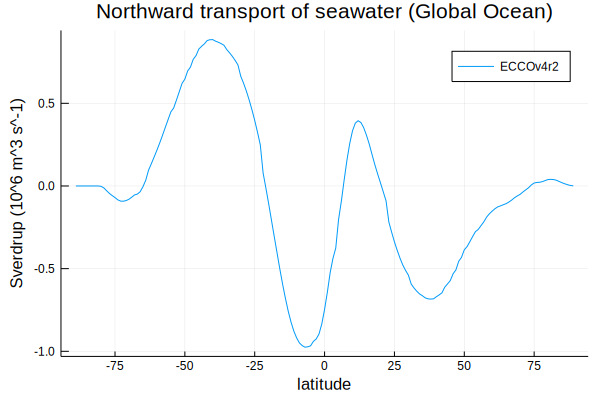

In [3]:
using Plots
lat=-89.0:89.0
plot(lat,T/1e6,xlabel="latitude",ylabel="Sverdrup (10^6 m^3 s^-1)",
    label="ECCOv4r2",title="Northward transport of seawater (Global Ocean)")